## PHASE 3 PROJECT
Please fill out:

Student name: MARTIN MWANGI

Student pace: FULL TIME

Scheduled project review date/time:

Instructor name: ANTONNY MUIKO

Blog post URL:

## EXPLORATORY DATA ANALYSIS

## Business Problem
Our company is facing high customer churn, resulting in substantial revenue loss and brand damage. Current retention methods are ineffective. To address this, we need to develop a predictive model that accurately identifies at-risk customers. This model will guide targeted retention strategies, aiming to reduce churn and increase revenue.

## Business Understanding
The primary objective of this project is to reduce customer churn by accurately identifying at-risk customers using predictive modeling. By understanding which customers are likely to leave, the company can proactively implement targeted retention strategies, thereby reducing churn, minimizing revenue loss, and protecting the brand’s reputation.
#### Shareholders key questions
1. What are the main factors contributing to customer churn?
2. Which customer segments are most at risk of churning?
3. How can we improve customer satisfaction to reduce churn?
4. What are the financial implications of reducing churn?

## Data Understanding
We are going to use dataset from JB Link Telco Customer Churn which can be downloaded in [kaggle](https://www.kaggle.com/datasets/johnflag/jb-link-telco-customer-churn). We will use this data from JB Link which is a small size telecom company located in the state of California that provides Phone and Internet services to customers on more than a 1,000 cities and 1,600 zip codes. The main objective of this project is to address reasons that make customers to churn phone and internet services in the network industry. This project can be used by any network provider industry.
## dataset understanding
our dataset is known as **telco_churn_data.csv** is a csv file and contains 46 columns. we will pick just the relevant columns and drop the rest. we will have 2 models and some of the columns we will use in our model include:
1. Logistic regression - Target Variable: Churn Value, Other Variables: Tenure in Months, Monthly Charge, Internet Service, Contract.
2. decision tree model - Target Variable: Churn Value, Other Variables: Tenure in Months, Monthly Charge, Internet Service, Contract, Payment Method.

## Data preparation
The dataset will go through sanity check first thats is data cleaning, it includes:

1. Converting some data type columns to the preferred data type
2. Check the null or missing values and fill them, and drop where need be
3. Check and drop duplicates
4. Check and drop outliers

#### Performing data preparation

In [616]:
# importing necessary librarires
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [617]:
# reading our csv file or dataset
df = pd.read_csv("Documents/FLATIRON/Assignment/phase 3/Phase-3-Project/telco_churn_data.csv")
df.head(3)

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN


In [618]:
# checking columns to indentify the columns to drop and keep
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Churn Value', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction'],
      dtype='object')

My dataset has 46 columns and I need less than 15 column so i have decided instead of droping the irrelevant columns I create a new dataset that contains the relevant columns to be used in my project.

In [619]:
# creating  list of relevnt columns
relevant_columns = ['Tenure in Months', 'Internet Service', 'Contract', 'Payment Method',
                    'Monthly Charge', 'Total Long Distance Charges', 'Churn Value', 'CLTV'
                   ]

In [620]:
# creating a new datset we call it df1
df1 = df[relevant_columns]
df1.head(3)

,Tenure in Months,Internet Service,Contract,Payment Method,Monthly Charge,Total Long Distance Charges,Churn Value,CLTV
0,1,Yes,Month-to-Month,Bank Withdrawal,41.236,0.00,1,5433
1,8,Yes,Month-to-Month,Credit Card,83.876,390.80,1,5302
2,18,Yes,Month-to-Month,Bank Withdrawal,99.268,203.94,1,3179


In [621]:
df1.columns

Index(['Tenure in Months', 'Internet Service', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Long Distance Charges', 'Churn Value', 'CLTV'],
      dtype='object')

In [622]:
# some columns names dont look appealing lets rename them
df1 = df[relevant_columns].copy()
df1.rename(columns = {"Contract":"Contract Type",
                             "Total Long Distance Charges":"Long Distance Charges",
                             "CLTV":"Customer Lifetime Value"}, inplace = True)


In [623]:
df1.head(5)

,Tenure in Months,Internet Service,Contract Type,Payment Method,Monthly Charge,Long Distance Charges,Churn Value,Customer Lifetime Value
0,1,Yes,Month-to-Month,Bank Withdrawal,41.236,0.00,1,5433
1,8,Yes,Month-to-Month,Credit Card,83.876,390.80,1,5302
2,18,Yes,Month-to-Month,Bank Withdrawal,99.268,203.94,1,3179
3,25,Yes,Month-to-Month,Bank Withdrawal,102.440,494.00,1,5337
4,37,Yes,Month-to-Month,Bank Withdrawal,79.560,234.21,1,2793


### This is the description of the columns choosen under the relevant columns, that were used to create the new dataset and whose data is key in our project.
1. Tenure in Months - Indicates the total amount of months that the customer has been with the company by the end of the quarter
2. Internet Service - Indicates if the customer subscribes to Internet service with the company
3. Contract Type - The contract term of the customer (Month-to-month, One year, Two year).
4. Payment Method - The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
5. Monthly Charge - The amount charged to the customer monthly
6. Total Long Distance Charges - Indicates the customer’s average long distance charges, calculated to the end of the quarte
7. Churn Value - Whether the customer has churned (Yes, No), **(Where 0: The customer did not churn (i.e., they stayed with the company).and 1: The customer churned (i.e., they left the company).**
8. Customer Lifetime Value - This column indicates the total revenue a company can expect to earn from a customer during their lifetime with the company

#### Lets now perform the sanity check ups

In [624]:
# Checking the shape of the dataset
df1.shape

(7043, 8)

In [625]:
# checking the data type
df1.dtypes

Tenure in Months             int64
Internet Service            object
Contract Type               object
Payment Method              object
Monthly Charge             float64
Long Distance Charges      float64
Churn Value                  int64
Customer Lifetime Value      int64
dtype: object

In [626]:
# checking the iformation about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure in Months         7043 non-null   int64  
 1   Internet Service         7043 non-null   object 
 2   Contract Type            7043 non-null   object 
 3   Payment Method           7043 non-null   object 
 4   Monthly Charge           7043 non-null   float64
 5   Long Distance Charges    7043 non-null   float64
 6   Churn Value              7043 non-null   int64  
 7   Customer Lifetime Value  7043 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 440.3+ KB


In [627]:
# checking missing values
df1.isna().sum()

Tenure in Months           0
Internet Service           0
Contract Type              0
Payment Method             0
Monthly Charge             0
Long Distance Charges      0
Churn Value                0
Customer Lifetime Value    0
dtype: int64

In [628]:
#checking duplicates
df1.duplicated().sum()

0

we will check outliers in our numerical datatype that is Tenure in Months, Monthly Charge, Long Distance Charges and Customer Lifetime Value. we will use box plot and IQR to drop outliers.

Text(0.5, 1.0, 'Customer Lifetime Value')

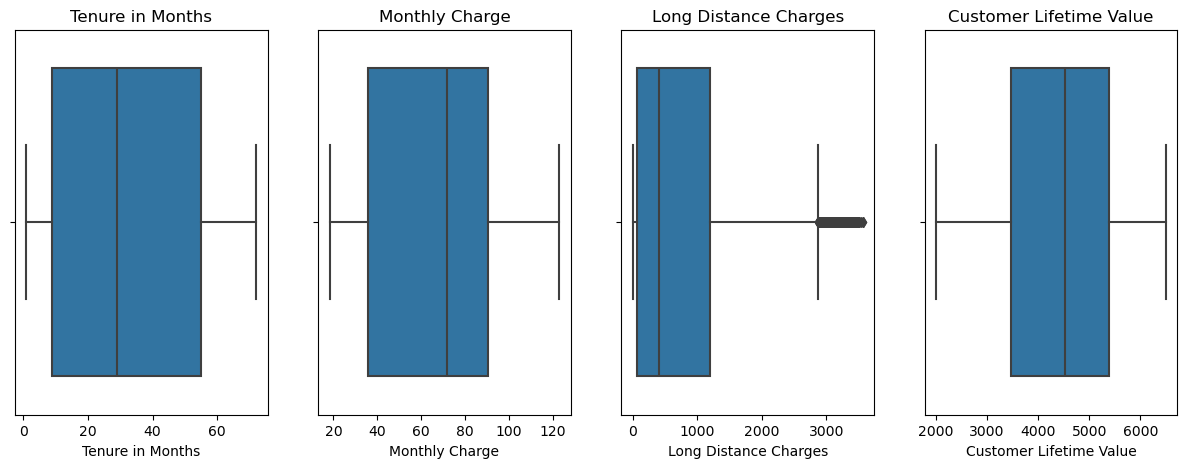

In [629]:
# setting up the box plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
# Tenure in Months
sns.boxplot(x = df1['Tenure in Months'], ax=axes[0])
axes[0].set_title('Tenure in Months')
# Monthly Charge
sns.boxplot(x = df1['Monthly Charge'], ax=axes[1])
axes[1].set_title('Monthly Charge')
# Long Distance Charges
sns.boxplot(x = df1['Long Distance Charges'], ax=axes[2])
axes[2].set_title('Long Distance Charges')
# Customer Lifetime Value
sns.boxplot(x = df1['Customer Lifetime Value'], ax=axes[3])
axes[3].set_title('Customer Lifetime Value')


#### Long distance charges has some outliers let drop them

In [630]:
df1.shape # shope before ddroping outlierrs

(7043, 8)

In [631]:
# i will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = df1['Long Distance Charges'].quantile(0.25)
Q3 = df1['Long Distance Charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df1[(df1['Long Distance Charges'] >= lower_bound) & (df1['Long Distance Charges'] <= upper_bound)]

In [632]:
df2.shape # shae after dropping outliers

(6847, 8)

In [633]:
df2.columns

Index(['Tenure in Months', 'Internet Service', 'Contract Type',
       'Payment Method', 'Monthly Charge', 'Long Distance Charges',
       'Churn Value', 'Customer Lifetime Value'],
      dtype='object')

In [634]:
# checking multicollineality
select_num = df2.select_dtypes(include=['float64', 'int64'])
corr = select_num.corr()
corr

,Tenure in Months,Monthly Charge,Long Distance Charges,Churn Value,Customer Lifetime Value
Tenure in Months,1.000000,0.222181,0.652783,-0.350357,0.383548
Monthly Charge,0.222181,1.000000,0.229391,0.239416,0.083466
Long Distance Charges,0.652783,0.229391,1.000000,-0.221828,0.261015
Churn Value,-0.350357,0.239416,-0.221828,1.000000,-0.120438
Customer Lifetime Value,0.383548,0.083466,0.261015,-0.120438,1.000000


## Model Evaluation

## Logistic regression 
We wil use logistic model to identify if a customer will churn or will not churn. The effectiveness of this logistic regression model will be evaluated on metrics such as accuracy, precision, recall, and the area under the ROC curve (AUC-ROC). These metrics will help determine how well the model is performing in predicting customer churn. lets get it.

We need to convert our categorical variables to numeric and we will creating of dummy variables, dummy variables will help in avoiding multicollinearity and will make our model easy to interpret. The categorical variables in question are Internet services, contract type and payment method. lets get to work!.  

### Creating a copy of our dataset and creating dummy variables of our categorical variables

In [635]:
# lets create a copy of our df1 and name it logi
logi = df2.copy()

# lets create the dummy variables in our categorical variables
logi = pd.get_dummies(logi, columns=['Internet Service', 'Contract Type', 'Payment Method'], drop_first=True, dtype=int)
logi.head(3)

,Tenure in Months,Monthly Charge,Long Distance Charges,Churn Value,Customer Lifetime Value,Internet Service_Yes,Contract Type_One Year,Contract Type_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,41.236,0.00,1,5433,1,0,0,0,0
1,8,83.876,390.80,1,5302,1,0,0,1,0
2,18,99.268,203.94,1,3179,1,0,0,0,0


In [636]:
logi.shape

(6847, 10)

### defining our target variable (y) and our features of our model (X)

In [637]:
# define our X and y
X = logi.drop('Churn Value', axis=1)
y = logi['Churn Value']

### split data using train test split, we will use 70/30 train to test respectively and our random state we set it to 42

In [638]:
# import the split module
from sklearn.model_selection import train_test_split

# lets split the data to train and test
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the logistic regression model, we will add class_weight='balanced' parameter to fight with class imbalance incase the dataset is imbalanced

In [639]:
# import the relevant libary
from sklearn.linear_model import LogisticRegression

# instiante our logistic model
logi_model = LogisticRegression(penalty='l2', C=5.0, class_weight='balanced', solver='liblinear')
logi_model.fit(X_train, y_train)

LogisticRegression(C=5.0, class_weight='balanced', solver='liblinear')

### Make predictions

In [640]:
# lets predict our values
y_pred = logi_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [641]:
pred_counts = pd.Series(y_pred).value_counts()
print(pred_counts)

0    1152
1     903
Name: count, dtype: int64


In [642]:
pred_counts = pd.Series(y_pred).value_counts()
print(f"The number of customers who never churned  are: {pred_counts.get(0, 0)}")
print(f"The number of customers who churned are: {pred_counts.get(1, 0)}")

The number of customers who never churned  are: 1152
The number of customers who churned are: 903


### Evaluating our model performance
To understand how well our model is performing and to assess its potential future reliability. We will use some metrics to  check our model performance. we will compare our model performance using 3 performance metrics that is confusion matrix, F1 score and ROC and AUC

In [643]:
from sklearn.metrics import accuracy_score
score = round(accuracy_score(y_test, y_pred) * 100, 2)
score

75.57

In [644]:
# confusion matrix metric
from sklearn.metrics import confusion_matrix

# define the matrix
cm = confusion_matrix(y_test, y_pred)

In [645]:
# Extracting values
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives


In [646]:
accuracy = round((TP + TN) / (TP + TN + FP + FN) * 100, 2)
precision = round(TP / (TP + FP) * 100,2)
recall = round(TP / (TP + FN) * 100,2)
f1_score = round(2 * (precision * recall) / (precision + recall),2)
print("The accuracy of our model is:", accuracy,"%")
print("The precision of our model is:", precision,"%")
print("The recall of our model is:", recall,"%")
print("The f1_score of our model is:", f1_score,"%")


The accuracy of our model is: 75.57 %
The precision of our model is: 54.71 %
The recall of our model is: 84.16 %
The f1_score of our model is: 66.31 %


<Figure size 1200x800 with 0 Axes>

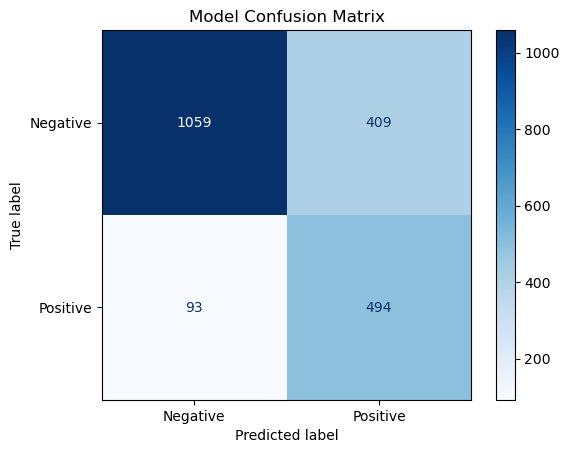

In [647]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot the confusion matrix
plt.figure(figsize=(12,8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Model Confusion Matrix")
plt.show()


### Interpreting our Logistic model
1. **Accuracy of 75.62%** - The model predicted churn status of  about 76% of the customers. This means that in every 100 customers in our test, the model predicted 76 customers correctly. That means it correctly identified churn states for majority of the customers
2. **Precision of 54.78%** - Of all customers predicted to churn, only 55% actually do. This means nearly half of the customers identified as at risk might not actually churn
3. **Recall of 83.99%** - A recall of 84% shows that the model is good at identifing most of the customers who are at risk of leaving the organization
4. **F1 score of 66.31%** - indicates that the model is reasonably effective at identifying at-risk customers with a moderate trade-off between false positives and false negatives.

## Decision Tree Model

In [648]:
# lets copy our dataset and name it deci_tree
deci_tre1 = df2.copy()

### using one hot enconder to change our categorical variable to numerical
The categorical variables in question are Internet services, contract type and payment method. lets get to work!.  

In [649]:
# importing necessary enconding library
from sklearn.preprocessing import OneHotEncoder

# columns to be encoded
encode_col = ['Internet Service', 'Contract Type', 'Payment Method']

# seperates numerical data from categorical data
X_numerical = deci_tre1.drop(encode_col + ['Churn Value'], axis=1)

# intiliaze OHE
ohe = OneHotEncoder(drop="first", sparse_output=False)

In [650]:
# fit and transform the categorical variable
encode = ohe.fit_transform(deci_tre1[encode_col])

#combine encoded features with numerical features
X_encoded = pd.DataFrame(encode, columns=ohe.get_feature_names_out(encode_col))
dec_tre = pd.concat([X_encoded.reset_index(drop=True), X_numerical.reset_index(drop=True)], axis=1)

In [651]:
# confirming if we categorical variable have been encoded
dec_tre.head()

,Internet Service_Yes,Contract Type_One Year,Contract Type_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check,Tenure in Months,Monthly Charge,Long Distance Charges,Customer Lifetime Value
0,1.0,0.0,0.0,0.0,0.0,1,41.236,0.00,5433
1,1.0,0.0,0.0,1.0,0.0,8,83.876,390.80,5302
2,1.0,0.0,0.0,0.0,0.0,18,99.268,203.94,3179
3,1.0,0.0,0.0,0.0,0.0,25,102.440,494.00,5337
4,1.0,0.0,0.0,0.0,0.0,37,79.560,234.21,2793


### Define our target variable (y) and our feature labels(X)

In [652]:
# define X and y
y = deci_tre1['Churn Value']

### split data using train test split, we will use 70/30 train to test respectively and our random state we set it to 42

In [653]:
# lets split the data to train and test
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the Decision model, we will add class_weight='balanced', max_depth, min_samples_split, min_samples_leaf parameter to fight with class imbalance and overfiting and under fitting using the hyperparameters.

In [654]:
# we intialize our model and importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dec_tre_model = DecisionTreeClassifier(max_depth=7, 
                                   min_samples_split=10, 
                                   min_samples_leaf=6, 
                                   class_weight='balanced', 
                                   random_state=42)
# implementing cross validation
cv_scores = cross_val_score(dec_tre_model, X, y, cv=5, scoring='accuracy')

# fiting our model
dec_tre_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=6,
                       min_samples_split=10, random_state=42)

In [655]:
# Checking the accuracy of the model
score = round(accuracy_score(y_test, y_pred) * 100, 2)
score

75.57

In [656]:
# Predicting our model
y_pred = dec_tre_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [657]:
pred_counts = pd.Series(y_pred).value_counts()
print(f"The number of customers who never churned are: {pred_counts.get(0, 0)}")
print(f"The number of customers who churned are: {pred_counts.get(1, 0)}")

The number of customers who never churned are: 1257
The number of customers who churned are: 798


### Evaluating our model performance
To understand how well our model is performing and to assess its potential future reliability. We will use some metrics to  check our model performance. we will compare our model performance using 3 performance metrics that is confusion matrix, F1 score and ROC and AUC

In [658]:
from sklearn.metrics import roc_curve, auc
# First calculate the probability scores of each of the datapoints:
y_score = dec_tre_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

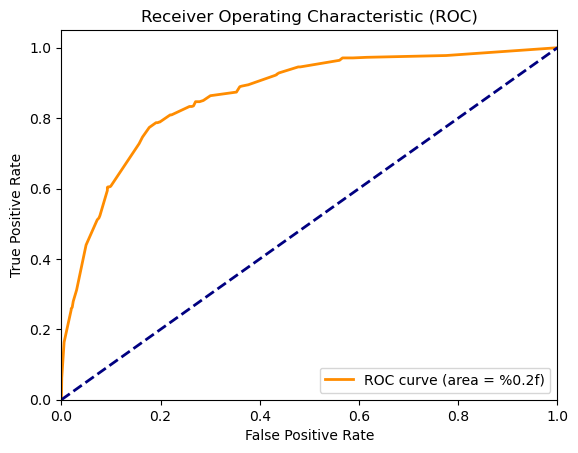

In [659]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [660]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8646149079279021


In [661]:
score = round(accuracy_score(y_test, y_pred) * 100, 2)
score

78.83

In [662]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1145,  323],
       [ 112,  475]], dtype=int64)

In [663]:
# Extracting values
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives


In [664]:
accuracy = round((TP + TN) / (TP + TN + FP + FN) * 100, 2)
precision = round(TP / (TP + FP) * 100,2)
recall = round(TP / (TP + FN) * 100,2)
f1_score = round(2 * (precision * recall) / (precision + recall),2)
print("The accuracy of our model is:", accuracy,"%")
print("The precision of our model is:", precision,"%")
print("The recall of our model is:", recall,"%")
print("The f1_score of our model is:", f1_score,"%")

The accuracy of our model is: 78.83 %
The precision of our model is: 59.52 %
The recall of our model is: 80.92 %
The f1_score of our model is: 68.59 %


<Figure size 1200x800 with 0 Axes>

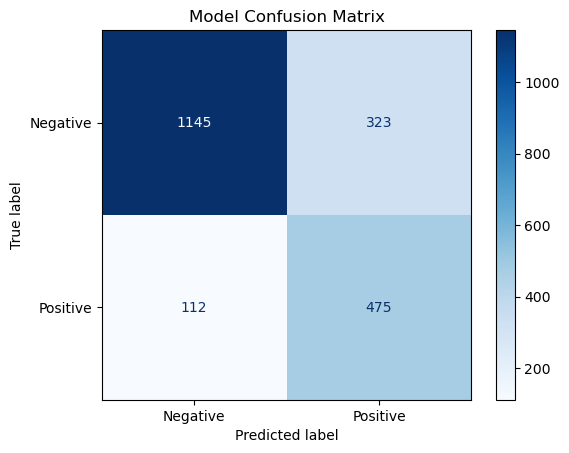

In [665]:
# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot the confusion matrix
plt.figure(figsize=(12,8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Model Confusion Matrix")
plt.show()

### Interpreting our Decision Tree model
1. **Accuracy of 78.83%** - The model predicted churn status of  about 79% of the customers. This means that in every 100 customers in our test, the model predicted 79 customers correctly. That means it correctly identified churn states for majority of the customers
2. **Precision of 59.52%** - Of all customers predicted to churn, only 59% actually do. This means nearly half of the customers identified as at risk might not actually churn
3. **Recall of 80.92%** - A recall of 81% shows that the model is good at identifing most of the customers who are at risk of leaving the organization
4. **F1 score of 68.59%** - indicates that the model is reasonably effective at identifying at-risk customers with a moderate trade-off between false positives and false negatives.